<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">2026</p>
<p style="margin: 0; text-align:right;">Samsung AI course</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CLUSTERING IMPLEMENTATION - A USE CASE

### **Chronic kidney disease (CKD) patients dataset**

We will work with a public and well-known dataset, in which different variables regarding chronic kidney disease (CKD) in different patients are studied. We will divide our study in 4 parts:
1. Data preparation and exploratory data analysis
2. Clustering algorithms implementation and evaluation
3. Validation and visualization

#### Some background about the dataset
What is CKD?
- Chronic kidney disease (CKD), also known as chronic renal disease, involves heterogenous conditions that damage kidney.
- Some of the complications include high blood pressure, anemia (low blood count), weak bones, poor nutritional health and nerve damage.
- Early detection and treatment can often keep chronic kidney disease from getting worse.

The original dataset was obtained over a 2-months period from a hospital in India. Data was collected from patients in a potential early stage of the disease. The attributes studied are CKD indicators, so the interpretation of the obtained models can be very useful.

In its origin, the dataset was thought to be used in the task of classification. Therefore, one of the variables contains the "classification" itself, that is, whether the patient has or has not the disease. Since we are going to work with a clustering analysis problem and not a classification one, we will remove that class (even though we may use it at the end to check how well the clusters we have obtained relate to that classes). 

Importing the needed libraries

In [3]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score
#from kneed import KneeLocator

In case not installed yet, you can install libraries and modules with pip or conda.

```conda install -c conda-forge kneed ```

Visualization configuration

In [1]:
%matplotlib inline

## 1. Data preparation and exploratory data analysis

Loading the dataset

In [4]:
ckd_init = pd.read_csv('kidney_disease.csv')

Let's get some information about it... How many patients do we have? (Each row contains one patient information) How many variables are we studying? Of which types are those? Are there NULL fields?

In [5]:
ckd_init.shape

(400, 26)

In [6]:
ckd_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
ckd_init.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


#### Data dictionary
1. **age** - age
2. **bp** - blood pressure
3. **sg** - specific gravity
4. **al** - albumin
5. **su** - sugar
6. **rbc** - red blood cells
7. **pc** - pus cell
8. **pcc** - pus cell clumps
9. **ba** - bacteria
10. **bgr** - blood glucose random
11. **bu** - blood urea
12. **sc** - serum creatinine
13. **sod** - sodium
14. **pot** - potassium
15. **hemo** - hemoglobin
16. **pcv** - packed cell volume
17. **wc** - white blood cell count
18. **rc** - red blood cell count
19. **htn** - hypertension
20. **dm** - diabetes mellitus
21. **cad** - coronary artery disease
22. **appet** - appetite
23. **pe** - pedal edema
24. **ane** - anemia
25. **classification** - class

#### Features description
1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

Rename the columns to have meaningful names and check dtypes

In [8]:
cols_names = {"bp":"blood_pressure",
              "sg":"specific_gravity",
              "al":"albumin",
              "su":"sugar",
              "rbc":"red_blood_cells",
              "pc":"pus_cell",
              "pcc":"pus_cell_clumps",
              "ba":"bacteria",
              "bgr":"blood_glucose_random",
              "bu":"blood_urea",
              "sc":"serum_creatinine",
              "sod":"sodium",
              "pot":"potassium",
              "hemo":"haemoglobin",
              "pcv":"packed_cell_volume",
              "wc":"white_blood_cell_count",
              "rc":"red_blood_cell_count",
              "htn":"hypertension",
              "dm":"diabetes_mellitus",
              "cad":"coronary_artery_disease",
              "appet":"appetite",
              "pe":"pedal_edema",
              "ane":"anemia"}

ckd_processed = ckd_init.rename(columns = cols_names)

We change red_blod_cell_count, packed_cell_volume and white_blood_cell_count to numerical dtype. (Some fields are filled with '?' instead of NaN, therfore, we use errors='coerce')

In [9]:
ckd_processed['red_blood_cell_count'] = pd.to_numeric(ckd_processed['red_blood_cell_count'], errors='coerce')
ckd_processed['packed_cell_volume'] = pd.to_numeric(ckd_processed['packed_cell_volume'], errors='coerce')
ckd_processed['white_blood_cell_count'] = pd.to_numeric(ckd_processed['white_blood_cell_count'], errors='coerce')

We drop ID column. (We will still leave "classification" column for some issues, but we will drop it before performing clustering.)

In [10]:
ckd_processed.drop(["id"],axis=1,inplace=True) 

Check for unique values of features

In [11]:
for i in ckd_processed.columns:
    print(f'{i} : {ckd_processed[i].nunique()} values')

age : 76 values
blood_pressure : 10 values
specific_gravity : 5 values
albumin : 6 values
sugar : 6 values
red_blood_cells : 2 values
pus_cell : 2 values
pus_cell_clumps : 2 values
bacteria : 2 values
blood_glucose_random : 146 values
blood_urea : 118 values
serum_creatinine : 84 values
sodium : 34 values
potassium : 40 values
haemoglobin : 115 values
packed_cell_volume : 42 values
white_blood_cell_count : 89 values
red_blood_cell_count : 45 values
hypertension : 2 values
diabetes_mellitus : 5 values
coronary_artery_disease : 3 values
appetite : 2 values
pedal_edema : 2 values
anemia : 2 values
classification : 3 values


Numerical vs categorical variables

In [12]:
numerical_features = []
categorical_features = []

for i in ckd_processed.columns:
    if ckd_processed[i].dtype == 'object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

Categorical features:  ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


Check unique values in categorical features

In [13]:
for feats in categorical_features:
    print(f'{feats} --> {ckd_processed[feats].unique()}')

red_blood_cells --> [nan 'normal' 'abnormal']
pus_cell --> ['normal' 'abnormal' nan]
pus_cell_clumps --> ['notpresent' 'present' nan]
bacteria --> ['notpresent' 'present' nan]
hypertension --> ['yes' 'no' nan]
diabetes_mellitus --> ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease --> ['no' 'yes' '\tno' nan]
appetite --> ['good' 'poor' nan]
pedal_edema --> ['no' 'yes' nan]
anemia --> ['no' 'yes' nan]
classification --> ['ckd' 'ckd\t' 'notckd']


Correct the errors in "diabetes_mellitus", "coronary_artery_disease" and "classification"

In [14]:
ckd_processed['diabetes_mellitus'].replace(to_replace = {'\tno':'no',
                                                         '\tyes':'yes',
                                                         ' yes':'yes'}, 
                                           inplace = True)

ckd_processed['coronary_artery_disease'].replace(to_replace = '\tno', 
                                                 value='no', 
                                                 inplace = True)

ckd_processed['classification'].replace(to_replace = 'ckd\t', 
                                        value = 'ckd',
                                        inplace = True)

C:\Users\alere\AppData\Local\Temp\ipykernel_12464\3283390162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ckd_processed['diabetes_mellitus'].replace(to_replace = {'\tno':'no',
C:\Users\alere\AppData\Local\Temp\ipykernel_12464\3283390162.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [15]:
for feats in categorical_features:
    print(f'{feats} --> {ckd_processed[feats].unique()}')

red_blood_cells --> [nan 'normal' 'abnormal']
pus_cell --> ['normal' 'abnormal' nan]
pus_cell_clumps --> ['notpresent' 'present' nan]
bacteria --> ['notpresent' 'present' nan]
hypertension --> ['yes' 'no' nan]
diabetes_mellitus --> ['yes' 'no' nan]
coronary_artery_disease --> ['no' 'yes' nan]
appetite --> ['good' 'poor' nan]
pedal_edema --> ['no' 'yes' nan]
anemia --> ['no' 'yes' nan]
classification --> ['ckd' 'notckd']


Check missing values

In [16]:
ckd_processed.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

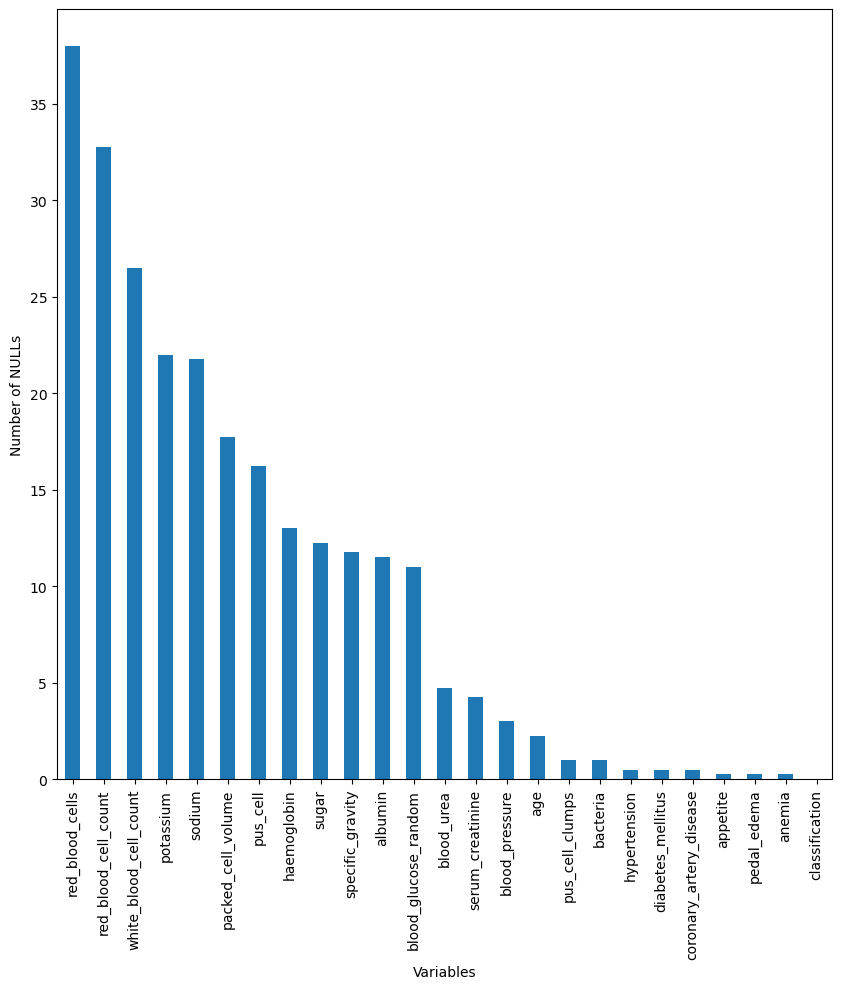

In [17]:
((ckd_processed.isnull().sum()/ckd_processed.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))
plt.xlabel('Variables')
plt.ylabel('Number of NULLs')
plt.show()

Deal with missing data: simple approach... replace numerical null values with mean and categorical null values with mode.

Other more sophisticated methods: https://scikit-learn.org/stable/modules/impute.html#impute

In [18]:
for num in numerical_features:
    ckd_processed[num].fillna(ckd_processed[num].mean(), inplace=True)
    
for cat in categorical_features:
    ckd_processed[cat].fillna(ckd_processed[cat].mode()[0], inplace=True)

C:\Users\alere\AppData\Local\Temp\ipykernel_12464\3331135933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ckd_processed[num].fillna(ckd_processed[num].mean(), inplace=True)
C:\Users\alere\AppData\Local\Temp\ipykernel_12464\3331135933.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [20]:
ckd_processed.isnull().sum().sort_values(ascending=False)

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [22]:
size = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ckd_processed.select_dtypes(include=[np.number]))
    size.append(kmeans.inertia_)

c:\todo\Anaconda\envs\curso_ia\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\todo\Anaconda\envs\curso_ia\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\todo\Anaconda\envs\curso_ia\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\todo\Anaconda\envs\curso_ia\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

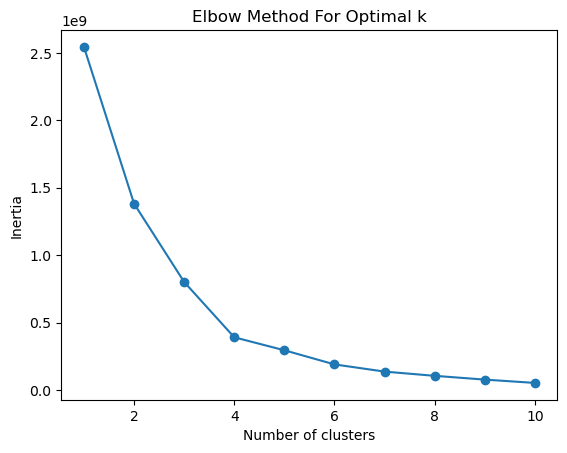

In [26]:
plt.plot(range(1,11), size, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()